## Title - Analyse a data set which contains various measurements on patient health and cardiovascular statistics
The goal of our analysis is to to predict if a patient has any cardiovascular disease or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
values=pd.read_csv('values.csv')
values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
labels=pd.read_csv('labels.csv')
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


Here we are provided with two separate dataset for values & labels.
We will merge them into dataset 'df'.
As we have **lebelled data** in our dataset, we can consider of using **Supervised ML algo** for the predicition.

In [4]:
df=pd.merge(values,labels,on='patient_id')
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [5]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

## Features :
There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
-  **patient_id:**
Unique id for individuals
-  **slope_of_peak_exercise_st_segment (type: int):** 
the slope of the peak exercise ST segment, an electrocardiography (ECG) read out indicating quality of blood flow to the heart
-  **thal  (type: categorical):**
results of thallium stress test measuring blood flow to the heart, with possible values **normal, fixed_defect, reversible_defect**
-  **resting_blood_pressure(type: int):**
Over time, high blood pressure can damage arteries that feed your heart. 
-  **chest_pain_type (type: int):** 
chest pain type (4 values) 1-4
-  **num_major_vessels (type: int):**
number of major vessels (0-3) colored by flourosopy. **Fluoroscopy**: used to help the healthcare provider see the flow of blood through the coronary arteries. It can check for arterial blockages
-  **fasting_blood_sugar_gt_120_mg_per_dl (type: binary):**  fasting blood sugar > 120 mg/dl
-  **resting_ekg_results (type: int):**
resting electrocardiographic results (values 0,1,2)
-  **serum_cholesterol_mg_per_dl (type: int):**
serum cholestoral in mg/dl
-  **oldpeak_eq_st_depression (type: float):** 
oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
-  **sex (type: binary):** 
0: female, 1: male
-  **age (type: int):** 
age in years
-  **max_heart_rate_achieved (type: int):** 
maximum heart rate achieved (beats per minute)
-  **exercise_induced_angina (type: binary):** 
exercise-induced chest pain (0: False, 1: True) **Angina** is a type of chest pain caused by reduced blood flow to the heart.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [8]:
df.duplicated().any()

False

**The dataset consists of 180 individuals data. 
We neither have any missing values nor any duplicates**

In [9]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [10]:
df.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


As 'patient_id' is just an uniue id given to the individuals for an identification, it can not considered as a feature. We can drop it.

In [11]:
df=df.drop(['patient_id'],axis=1)

In [12]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [13]:
df.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


## **Univariate Analysis**

In [14]:
#import sweetviz as sv
#my_report = sv.analyze(df)
#my_report.show_html()

In given dataset we have:
-  Total 14 features
-  Categorical = 9 (including lebelled data)
-  Numerical = 5

In [15]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [16]:
cat=['slope_of_peak_exercise_st_segment','thal',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'sex','exercise_induced_angina']

In [17]:
num=['resting_blood_pressure','serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression','age',
       'max_heart_rate_achieved']

In [18]:
"""
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[num])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()
"""

"\nplt.figure(figsize=(20,25), facecolor='white')\nplotnumber = 1\n\nfor column in df:\n    if plotnumber<=9 :\n        ax = plt.subplot(3,3,plotnumber)\n        sns.histplot(data[num])\n        plt.xlabel(column,fontsize=20)\n        \n    plotnumber+=1\nplt.show()\n"

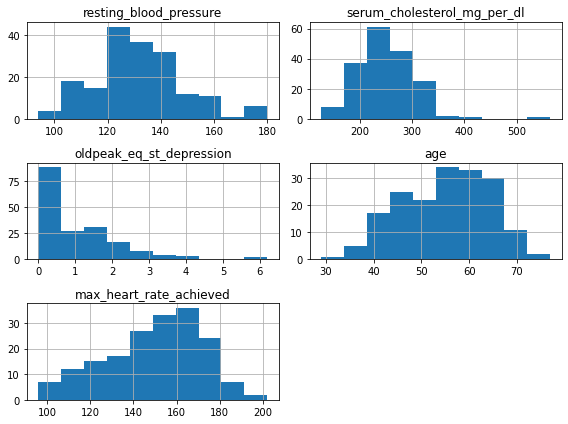

In [19]:
df.hist(num,figsize=(8,6))
plt.tight_layout()
plt.show()

1. 'resting_blood_pressure'- follows ND, maximum data lies in range 120-140
2. 'serum_cholesterol_mg_per_dl'- follows ND, maximum data lies in range 200-300
3. 'oldpeak_eq_st_depression'- Right skewed,maximum data lies in range 0-1
4. 'age' - follows ND, maximum data lies in range 120-140
5. 'max_heart_rate_achieved' - Left skewed,maximum data lies in range 140-170

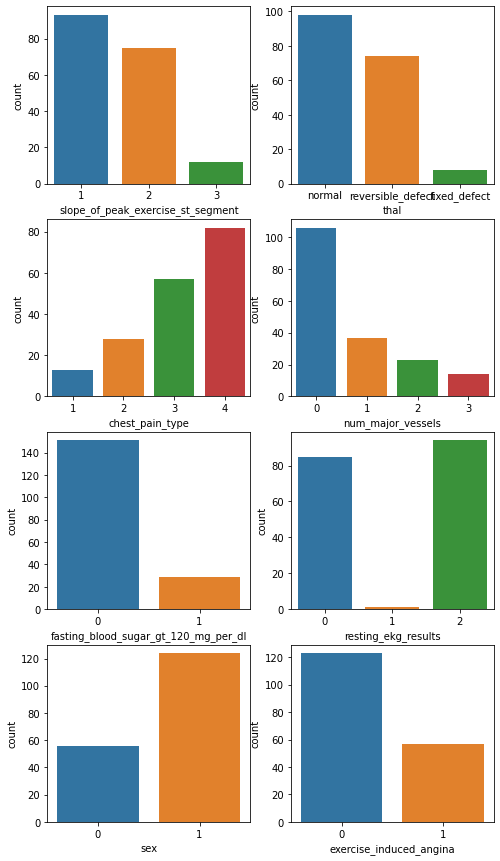

In [20]:
plt.figure(figsize=(8,15))
for i,col in zip(range (1,9),cat):
    plt.subplot(4,2,i)
    sns.countplot(x=col,data=df)
plt.show()


**Bivariate Analysys:**

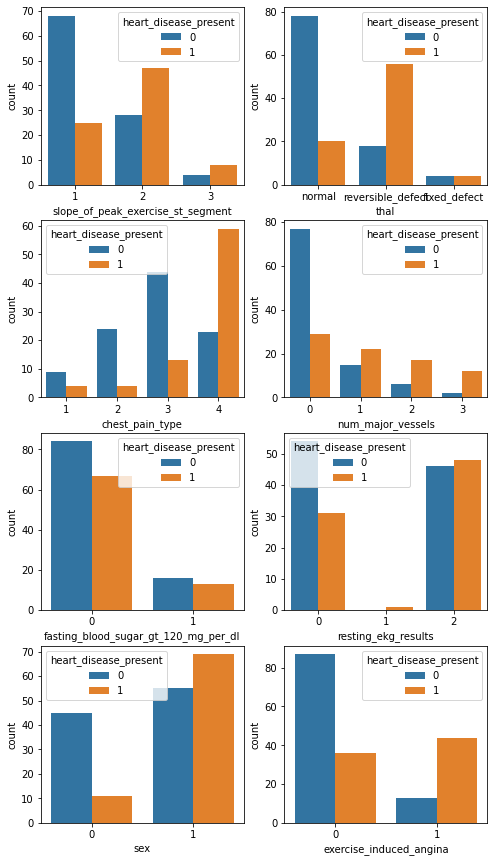

In [21]:
plt.figure(figsize=(8,15))
for i,col in zip(range (1,9),cat):
    plt.subplot(4,2,i)
    sns.countplot(x=col,data=df,hue='heart_disease_present')
plt.show()

Observations:
1. Individuals having **slope_of_peak_exercise_st_segment=2** are more prone to heart disease
2. Individuals having **thal=reversible_defect** are more prone to heart disease
3. Individuals having **exercise_induced_angina** are more prone to heart disease

**Risk of cardiovascular disease with respect to gender:**

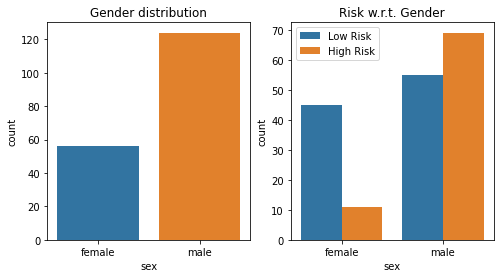

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(x='sex',data=df)
plt.xticks([0,1],['female','male'])
plt.title('Gender distribution')

plt.subplot(1,2,2)
sns.countplot(x='sex',data=df,hue='heart_disease_present')
plt.xticks([0,1],['female','male'])
plt.legend(labels=['Low Risk','High Risk'])
plt.title('Risk w.r.t. Gender')
plt.show()

Male individuals are more (almost double) in numbers than the female individuals.

## Data Preprocessing:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

We need to convert 'thal' column(object type) to numerical data type

In [24]:
df['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [25]:
thal_dict={'normal':0,'reversible_defect':1,'fixed_defect':2}
df['thal']=df['thal'].map(thal_dict)

In [26]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


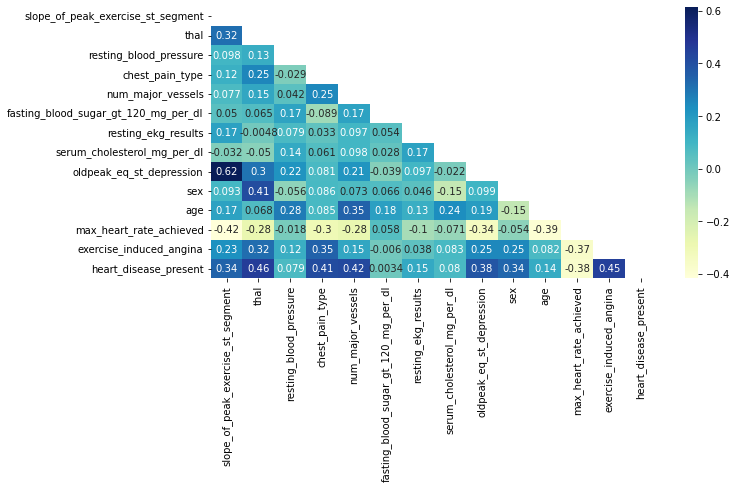

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",mask=np.triu(np.ones_like(df.corr())))
plt.show()

In [28]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

Features having **+ve correlation** with target variable:
-  'slope_of_peak_exercise_st_segment', 
-  'thal',
-  'chest_pain_type',
-  'num_major_vessels',
-  'oldpeak_eq_st_depression',
-  'sex',
-  'exercise_induced_angina'

Features having **-ve correlation** with target variable:
-  'max_heart_rate_achieved'

Features having **no correlation** with the target variable:
-  'resting_blood_pressure',
-  'fasting_blood_sugar_gt_120_mg_per_dl',
-  'resting_ekg_results'
-  'serum_cholesterol_mg_per_dl',
-  'age'

**Encoding categorical data**

In [29]:
print(cat)

['slope_of_peak_exercise_st_segment', 'thal', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'sex', 'exercise_induced_angina']


We can notice that from list of categorical features, some features are already contains 0 & 1, so encoding is not required.These features are:
-  'fasting_blood_sugar_gt_120_mg_per_dl', 
-  'sex',  
-  'exercise_induced_angina'

In [30]:
cat.remove('fasting_blood_sugar_gt_120_mg_per_dl')
cat.remove('sex')
cat.remove('exercise_induced_angina')
df1=pd.get_dummies(df,columns=cat,drop_first=True)
df1.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,slope_of_peak_exercise_st_segment_2,...,thal_1,thal_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2
0,128,0,308,0.0,1,45,170,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,110,0,214,1.6,0,54,158,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,125,0,304,0.0,1,77,162,1,1,0,...,0,0,0,0,1,0,0,1,0,1
3,152,0,223,0.0,1,40,181,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,178,0,270,4.2,1,59,145,0,0,0,...,1,0,0,0,0,0,0,0,0,1


**Feature Scaling**

We need to apply feature scaling on the following numerical columns:
-  'resting_blood_pressure'
-  'serum_cholesterol_mg_per_dl'
-  'oldpeak_eq_st_depression'
-  'age'
-  'max_heart_rate_achieved'

In [31]:
num

['resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
st=StandardScaler()
df1[num]=st.fit_transform(df[num])

In [34]:
df1.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,slope_of_peak_exercise_st_segment_2,...,thal_1,thal_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2
0,-0.195195,0,1.118269,-0.903207,1,-1.053964,0.932485,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,-1.256320,0,-0.669778,0.527616,0,-0.087134,0.387084,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,-0.372049,0,1.042182,-0.903207,1,2.383654,0.568884,1,1,0,...,0,0,0,0,1,0,0,1,0,1
3,1.219639,0,-0.498582,-0.903207,1,-1.591092,1.432436,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,2.752375,0,0.395442,2.852703,1,0.449994,-0.203768,0,0,0,...,1,0,0,0,0,0,0,0,0,1


**Spliting the Dataset**

In [35]:
X=df1.drop('heart_disease_present',axis=1)

In [36]:
y=df1['heart_disease_present']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As per problem statement, we need to predict if individual is having any cardiovascular disease or not.So we will go for **classification algorithms**.

**Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_train_pred=LR.predict(X_train)
y_train_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [42]:
y_pred1=LR.predict(X_test)
y_pred1

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

-  Calculating Accuracy

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [44]:
accuracy_train=accuracy_score(y_train,y_train_pred)
accuracy_train

0.8819444444444444

In [45]:
accuracy_test=accuracy_score(y_test,y_pred1)
accuracy_test

0.8611111111111112

In [46]:
LR.score(X_test,y_test)

0.8611111111111112

In [47]:
report=classification_report(y_test, y_pred1)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



In [48]:
pd.crosstab(y_train, y_train_pred)

col_0,0,1
heart_disease_present,,
0,78,6
1,11,49


In [49]:
pd.crosstab(y_test, y_pred1)

col_0,0,1
heart_disease_present,,
0,15,1
1,4,16


-  Cross-Validation

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
LR_cv=GridSearchCV(LR,{'C':[1,10,20]},cv=5, return_train_score=False)

In [52]:
LR_cv.fit(X,y)
LR_cv.cv_results_

{'mean_fit_time': array([0.0117928 , 0.01359162, 0.01319184]),
 'std_fit_time': array([0.00159918, 0.00149576, 0.00132577]),
 'mean_score_time': array([0.0023984 , 0.00159931, 0.00179896]),
 'std_score_time': array([0.00048947, 0.00048988, 0.00039976]),
 'param_C': masked_array(data=[1, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 10}, {'C': 20}],
 'split0_test_score': array([0.77777778, 0.77777778, 0.77777778]),
 'split1_test_score': array([0.83333333, 0.80555556, 0.80555556]),
 'split2_test_score': array([0.88888889, 0.88888889, 0.88888889]),
 'split3_test_score': array([0.72222222, 0.77777778, 0.75      ]),
 'split4_test_score': array([0.77777778, 0.80555556, 0.80555556]),
 'mean_test_score': array([0.8       , 0.81111111, 0.80555556]),
 'std_test_score': array([0.05665577, 0.04082483, 0.04648111]),
 'rank_test_score': array([3, 1, 2])}

In [53]:
df_LR_cv=pd.DataFrame(LR_cv.cv_results_)
df_LR_cv[['param_C','mean_test_score']]

,param_C,mean_test_score
0,1,0.800000
1,10,0.811111
2,20,0.805556


In [54]:
LR_cv.best_params_

{'C': 10}

In [55]:
LR_cv.best_score_

0.8111111111111111

-  Model performance with best parameters

In [56]:
LR=LogisticRegression(C=10)
LR.fit(X_train,y_train)
y_hat1=LR.predict(X_test)

In [57]:
LR_score=LR.score(X_test,y_test)
LR_score

0.8611111111111112

In [58]:
report1=classification_report(y_test, y_hat1)
print(report1)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



In [152]:
report1=classification_report(y_test, y_hat1,output_dict=True)
LR_recall=report1['1']['recall']
LR_recall

0.8

**Support Vector Classifier**

Let's check if data is balanced or not

In [59]:
df['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

As lebelled data seems to be balanced we can apply SVC directly without using SMOTE

In [60]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train,y_train)

SVC()

In [61]:
y_pred2=svclassifier.predict(X_test)

In [62]:
accuracy_test=accuracy_score(y_test,y_pred2)
accuracy_test

0.8055555555555556

In [63]:
report=classification_report(y_test, y_pred2)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36



In [64]:
pd.crosstab(y_test, y_pred2)

col_0,0,1
heart_disease_present,,
0,14,2
1,5,15


-  Cross Validation

In [65]:
SVC_cv=GridSearchCV(svclassifier,{'C':[1,10,20],'kernel':['rbf','sigmoid'],'gamma':['scale', 'auto']},cv=5, return_train_score=True)

In [66]:
SVC_cv.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             return_train_score=True)

In [67]:
df_SVC_cv=pd.DataFrame(SVC_cv.cv_results_)
df_SVC_cv[['param_C','param_gamma','param_kernel','mean_test_score']].sort_values(by='mean_test_score',
                                                                                  ascending=False).head()

,param_C,param_gamma,param_kernel,mean_test_score
1,1,scale,sigmoid,0.805556
3,1,auto,sigmoid,0.800000
11,20,auto,sigmoid,0.800000
2,1,auto,rbf,0.794444
7,10,auto,sigmoid,0.794444


In [68]:
SVC_cv.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [69]:
SVC_cv.best_score_

0.8055555555555556

-  Model performance with best parameters

In [70]:
svclassifier = SVC(C= 1, gamma= 'scale', kernel= 'sigmoid')
svclassifier.fit(X_train,y_train)
y_hat2=svclassifier.predict(X_test)

In [71]:
SVC_score=svclassifier.score(X_test,y_test)
SVC_score

0.8611111111111112

In [72]:
report2=classification_report(y_test, y_hat2)
print(report2)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [150]:
report2=classification_report(y_test, y_hat2,output_dict=True)
SVC_recall=report2['1']['recall']
SVC_recall

0.75

 **KNN**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [74]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

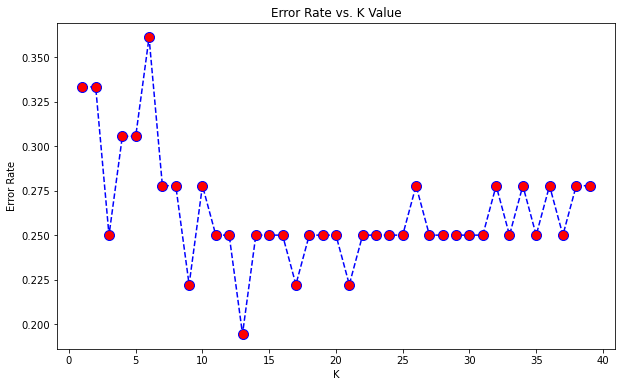

In [75]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [76]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)

In [77]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred3))

The accuracy score is :  0.8055555555555556


In [78]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [79]:
pd.crosstab(y_test, y_pred3)

col_0,0,1
heart_disease_present,,
0,15,1
1,6,14


-  Cross Validation

In [80]:
knn_cv=GridSearchCV(knn,{'n_neighbors':[12,13,14,15],'weights' : ['uniform', 'distance'],'algorithm' : ['auto','brute']},cv=5,
                    return_train_score=True)

In [81]:
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'algorithm': ['auto', 'brute'],
                         'n_neighbors': [12, 13, 14, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [82]:
df_knn_cv=pd.DataFrame(knn_cv.cv_results_)
df_knn_cv[['param_algorithm','param_n_neighbors','param_weights','mean_test_score']].sort_values(by='mean_test_score',
                                                                                                 ascending=False).head()

,param_algorithm,param_n_neighbors,param_weights,mean_test_score
5,auto,14,distance,0.805556
13,brute,14,distance,0.805556
6,auto,15,uniform,0.800000
7,auto,15,distance,0.800000
14,brute,15,uniform,0.800000


In [83]:
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'distance'}

In [84]:
knn_cv.best_score_

0.8055555555555556

-  Model performance with best parameters

In [85]:
knn = KNeighborsClassifier(n_neighbors=14,algorithm='auto',weights='distance')
knn.fit(X_train,y_train)
y_hat3=knn.predict(X_test)

In [86]:
knn_score=knn.score(X_test,y_test)
knn_score

0.8055555555555556

In [87]:
report3=classification_report(y_test, y_hat3)
print(report3)

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [151]:
report3=classification_report(y_test, y_hat3,output_dict=True)
knn_recall=report3['1']['recall']
knn_recall

0.7

**Naive Bayes Classifier**

In [88]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [89]:
y_pred4=nb.predict(X_test)

In [90]:
# Checking Accuracy score
nb_score=nb.score(X_test,y_test)
nb_score

0.6111111111111112

In [163]:
report4=classification_report(y_test, y_pred4,output_dict=True)
nb_recall=report7['1']['recall']
nb_recall

0.7

### Non Linear Algorithms

Here we need not to do any preprocessing or feature scaling, so we can apply algoritms to our original (merged dataset )
directly

In [91]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


In [92]:
df.shape

(180, 14)

In [93]:
X_df=df.drop('heart_disease_present',axis=1)
y_df=df['heart_disease_present']

In [94]:
X_train, X_test, y_train, y_test = train_test_split( X_df, y_df, test_size=0.2, random_state=42)

**Decision Tree**

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_pred5=dt.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred5)

0.6944444444444444

-  cross validation

In [99]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=42)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5,return_train_score=True)

In [100]:
tree_cv.fit(X,y)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             return_train_score=True, scoring='accuracy', verbose=1)

In [101]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'random'}

In [102]:
tree_cv.best_score_

0.788888888888889

-  Model performance with best parameters

In [103]:
dt=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 3,
 min_samples_leaf= 6,
 min_samples_split= 2,
 splitter= 'random',random_state=42)
dt.fit(X_train,y_train)
y_hat5=dt.predict(X_test)

In [104]:
dt_score=dt.score(X_test,y_test)
dt_score

0.8055555555555556

In [105]:
report5=classification_report(y_test, y_hat5)
print(report5)

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [147]:
report5=classification_report(y_test, y_hat5,output_dict=True)
dt_recall=report5['1']['recall']
dt_recall

0.7

**Random Forest Classifier**

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf=RandomForestClassifier(random_state=42)

In [108]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [109]:
y_pred6=rf.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred6)

0.8333333333333334

In [111]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
#max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=5, 
                               verbose=3, random_state=42, n_jobs=-1)

In [112]:
rf_cv.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=3)

In [113]:
rf_cv.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [114]:
rf_cv.best_score_

0.8055555555555556

-  Model performance with best parameters

In [115]:
rf=RandomForestClassifier(n_estimators= 400,
 min_samples_split=2,
 min_samples_leaf=2,
 max_features='auto',
 max_depth=20,
 bootstrap=True,random_state=42)
rf.fit(X_train,y_train)
y_hat6=rf.predict(X_test)

In [116]:
rf_score=rf.score(X_test,y_test)
rf_score

0.8611111111111112

In [137]:
report6=classification_report(y_test, y_hat6)
print(report6)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [160]:
report6=classification_report(y_test, y_hat6,output_dict=True)
rf_recall=report6['1']['recall']
rf_recall

0.75

**Gradeint Boosting Classifier**

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [120]:
y_pred7=gb.predict(X_test)

In [121]:
gb_score=gb.score(X_test,y_test)
gb_score

0.7777777777777778

In [162]:
report7=classification_report(y_test, y_pred7,output_dict=True)
gb_recall=report7['1']['recall']
gb_recall

0.7

### Conclusion

In [164]:
results=pd.DataFrame({'Models':['LR','SVC','KNN','NB','DT','RF','GB'],'Accuracy':[LR_score,
                                                                                 SVC_score,
                                                                                 knn_score,
                                                                                 nb_score,
                                                                                 dt_score,
                                                                                 rf_score,
                                                                                 gb_score],
                                                                        'Recall':[LR_recall,
                                                                                 SVC_recall,
                                                                                 knn_recall,
                                                                                 nb_recall,
                                                                                 dt_recall,
                                                                                 rf_recall,
                                                                                 gb_recall
                                                                                 ]})

In [165]:
results.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy,Recall
0,LR,0.861111,0.80
1,SVC,0.861111,0.75
5,RF,0.861111,0.75
2,KNN,0.805556,0.70
4,DT,0.805556,0.70
6,GB,0.777778,0.70
3,NB,0.611111,0.70


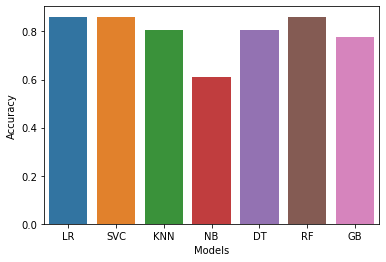

In [168]:
sns.barplot(x='Models',y='Accuracy',data=results)
plt.show()

The result shows that following are our top 3 model based on **'Accuracy Score'**
-  Logistic regression
-  Support vector classifier
-  Random Forest classifier

## Conclusion

For all the patients who actually have heart disease, recall tells us how many individuals correctly identified as having a heart disease.

As we want to focus on predicting as many actual positive values as possible, we should consider to deploy **Logistic Regression** for prediction, as it is having the best **Recall Score : 80%** along with the highest **Accuracy Score :86%**